### 참고주소, https://github.com/youbeebee/ML-with-Python/ 

# Chap2. 지도학습(Supervised Learning)
1장의 붓꽃의 실제 측정값을 이용해 품종을 구분하는 것도 지도학습의 하나이다.
* 지도학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다.
* 이런 입력/출력 샘플 데이터, 즉 훈련 데이터로부터 머신러닝 모델을 만든다.
* 목표는 이전에 본적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것이다.

In [40]:
# 기본 import 패키지
from IPython.display import display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# pip install mglearn 실행해야 함.
import mglearn

%matplotlib inline

# 한글출력
matplotlib.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


## 2.1 분류와 회귀(Classification and Regression)
지도 학습에는 분류(classification)와 회귀(regression)가 있다.

* 분류: 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것. 두 개의 클래스로 분류하는 이진 분류<sup>binary classification</sup>와 셋 이상의 클래스로 분류하는 다중 분류<sup>multiclass classification</sup>로 나뉜다.
 > NOTE: 이진 분류에서 한 클래스를 양성 positive, 다른 클래스를 음성 negative이라고도 한다. 이는 장점을 나타내는 것이 아니라 학습하고자 하는 대상을 의미한다. 어떤 것을 양성이라고 할지는 주관적인 문제이다.
* 회귀: 연속적인 숫자(실수)를 예측하는 것. 출력 값에 연속성이 있다.

### 분류와 회귀를  출력값의 연속성으로 구분

## 2.2 일반화, 과대적합, 과소적합(Generalization, Overfitting and Underfitting)
모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있게 된 것을 훈련 세트에서 테스트 세트로 **일반화**<sup>generalization</sup>되었다고 한다. 복잡한 모델에서는 훈련 세트에만 정확한 모델이 될 수 있다.

가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 과대적합<sup>overfitting</sup>이라고 한다. 모델이 훈련 세트에 너무 가깝게 맞춰져 새로운 데이터에 일반화되기 어려울 때 일어난다. 반대로 모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하며 훈련 세트에도 잘 맞지 않는다. 너무 간단한 모델이 선택되는 것을 과소적합<sup>underfitting</sup>이라고 한다.

**좋은 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.**

![](https://github.com/amueller/introduction_to_ml_with_python/raw/0fd3cffc259693e13c28c366e119beace1faf8e8/images/overfitting_underfitting_cartoon.png)
그림 2-1. 모델의 복잡도에 따른 훈련과 테스트 정확도의 변화

### 2.2.1 모델 복잡도와 데이터셋 크기의 관계(Relation of Model Complexity to Dataset Size)
* 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊다.
* 데이터셋에 다양한 데이터 포인트가 많으면 과대적합 없이 더 복잡한 모델을 만들 수 있다. 
* 큰 데이터셋은 더 복잡한 모델을 만드는데 도움을 주지만 중복된 데이터나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않는다.

## 2.3 지도 학습 알고리즘(Supervised Machine Learning Algorithms)
- 가장 인기 있는 머신러닝 알고리즘들을 둘러보면서 데이터로부터 어떻게 학습하고 예측하는지를 설명
- 또한, 이런 모델에서 모델의 복잡도가 어떤 역할을 하는지 이야기하고 각 알고리즘이 모델을 어떻게 만드는지 소개
- 그리고 모델의 장단점을 평가하고 어떤 데이터가 잘 들어맞는지 살펴보자.
- 가장 중요한 매개변수와 옵션의 의미 설명하겠다.
- 유명한 알고리즘의 상세한 내용은  http://scikit-learn.org/stable/documentation 참고



### 2.3.1 예제에 사용할 데이터셋
forge 데이터셋: 인위적으로 만든 이진 분류 데이터셋. 데이터 포인트 26개와 특성 2개를 가진다

X.shape: (26, 2)


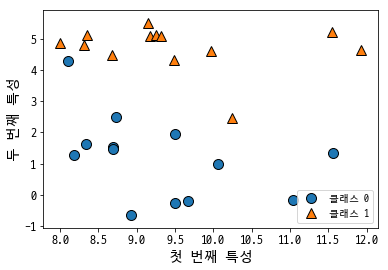

In [41]:
# 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그린다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

wave 데이터셋: 회귀 알고리즘 설명에 사용한다.입력 특성 하나와 모델링할 타깃 변수를 가진다.

Text(0,0.5,'타깃')

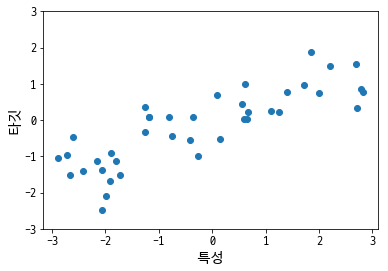

In [42]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

#### 인위적인 소규모 데이터셋 외에 scikit-learn의 실제 데이터셋 2개를 사용하겠습니다.

1. cancer 데이터셋 : 위스콘신 유방암 데이터셋. 유방암 종양의 임상 데이터가 기록된 실제 데이터셋.
 - 569개의 데이터와 30개의 특성을 가진다. 그 중 212개는 악성<sup>malignant</sup>(암 종양)이고 357개는 양성<sup>benign</sup>(해롭지 않은 종양)으로 레이블이 되어 있다.
 - 조직 데이터를 기반으로 종양이 악성인지 예측할 수 있도록 학습하는 것이 과제

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))
print("데이터의 형태: {}".format(cancer.data.shape))
print("클래스별 샘플 개수:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("특성 이름:\n{}".format(cancer.feature_names))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
데이터의 형태: (569, 30)
클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}
특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


2. boston 데이터셋 : 회귀분석용 보스턴 주택가격 데이터셋. 
 - 범죄율, 강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변 주택의 평균 가격을 예측한다. 
 - 데이터 506개와 특성 13개가 있다.

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shape: {}".format(boston.data.shape))

shape: (506, 13)


In [45]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))


X.shape: (506, 104)


In [12]:
# 내부적으로 PolynomialFeatures(degree=2, include_bias=False) 함수 실행
# degree : 차수
# include_bias : 상수항 생성 여부

 $ [x_1,x_2]→[1,x_1,x_2,x^2_1,x^2_2,x_{1} x_{2}] → [x^2_1,x^2_2,x_{1} x_{2}] $

 - 3개의 특성뿐 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장할 수 있다. 이처럼 특성을 유도해내는 것을 **특성 공학** <sup>feature engineering</sup>이라고 한다. load_extended_boston 함수를 이용해 불러들인 결과엔 기존 특성을 중복을 포함해 2개씩 짝지은 91개의 특성이 추가돼 총 104개의 특성이 있다.
 - 중복을 포함하지 않는 조합 공식 : $_nC_k = \binom{n}{k} = {n! \over k!(n-k)!} = {13! \over 2!(13-2)!}=78$
 - 중복을 포함한 조합 공식 : $_nH_k = _{n+k-1}C_k = \binom{n+k-1}{k} = {14! \over 2!(14-2)!}=91$
 
그럼 먼저 k-최근접 이웃(k-NN) 알고리즘을 살펴보자.

#### 2.3.2 k-최근접 이웃
+ k-NN<sup>k-Nearest Neighbors</sup>알고리즘은 가장 간단한 머신러닝 알고리즘으로 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 것의 전부이다. 
+ 예측할 땐 훈련 데이터셋에서 가장 가까운 데이터를 찾는다. 

#### k-최근접 이웃분류
forge 데이터셋을 분류했다. k&gt;1일 수도 있으며 이 경우 최근접 k개중 가장 많은 클래스를 레이블로 지정한다.

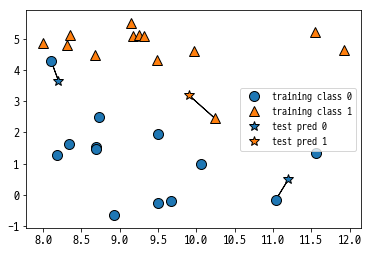

In [46]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

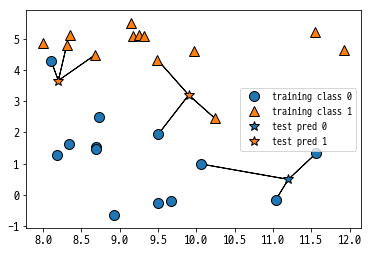

In [47]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

scikit-learn에서 분류를 위한 k-최근접 이웃 알고리즘은 KNeighborsClassifier에 구현되어 있다.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

# 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  

clf = KNeighborsClassifier(n_neighbors=3) # 모델 선택
clf = clf.fit(X_train, y_train)  # 훈련 데이터를 통해 분류 모델 학습

print("테스트 세트 예측: {}".format(clf.predict(X_test)))
print("테스트 세트 : {}".format(y_test))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 1 1 1 0 1 0]
테스트 세트 : [1 1 1 1 1 1 0]
테스트 세트 정확도: 0.86


**KNeighborsClassifier 분석**

이웃의 수에 따른 분류를 살펴보자.
테스트 포인트의 예측을 xy평면에 그려볼 수 있다. 이를 통해 **결정 경계**<sup>decision boundary</sup>를 볼 수 있다.

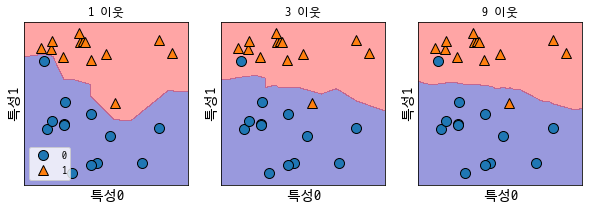

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환하기 때문에 객체 생성과 fit 메서드를 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
    
axes[0].legend(loc=3)


그림 2-6. 유방암 데이터셋을 사용한 복잡도와 일반화 사이의 관계

* 이웃을 하나 선택했을 때는 경계가 훈련 데이터에 가깝게 따라가고 있지만 이웃의 수를 늘리면 경계가 더 부드러워진다. 
* 부드러운 경계는 더 단순한 모델을 말한다. 즉, 이웃을 적게 사용하면 모델의 복잡도가 높아지고(그림 2-1 오른쪽) 많이 사용하면 복잡도는 낮아진다(그림 2-1 왼쪽). 
* 극단적으로 모든 훈련 데이터를 이웃으로 지정하는 경우 모든 테스트 데이터가 같은 값을 가지게 된다.

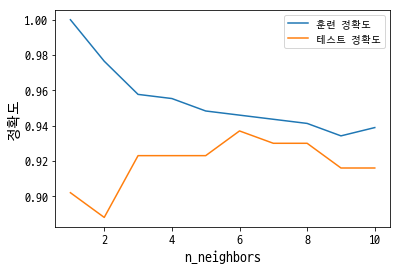

In [24]:
# 이웃의 수에 따른 정확도 비교

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

train_accuracy = []
test_accuracy = []
# 1에서 10까지 이웃을 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, train_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

그림 2-7 이웃의 수 변화에 따른 훈련 정확도와 테스트 정확도

* 이웃이 1일때는 훈련 데이터의 예측은 완벽하지만 이웃이 늘어나면 정확도가 낮아진다. 
* 테스트 세트의 정확도는 이웃을 많이 사용했을 때가 더 높다. 이는 이웃의 수가 1일 땐 모델이 너무 복잡해지는 것을 의미한다.
* KNeighborsClassifier에서 이웃이 10개일 땐 모델이 너무 단순해서 정확도가 낮아진다. 정확도가 가장 높을 때는 이웃이 6일 때이다.

**k-최근접 이웃 회귀**

k-최근접 이웃 알고리즘은 회귀 분석에도 쓰인다.
wave 데이터셋을 이용해서 회귀 분석을 해본다.이웃을 둘 이상 사용할 경우 이웃 간의 평균이 예측이 된다.

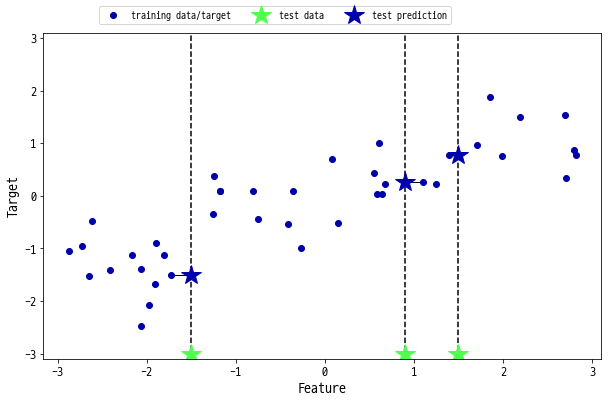

In [51]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
# 그림 2-8 wave 데이터셋에 대한 1-최근접 이웃 회귀 모델의 예측

그림 2-8 wave 데이터셋에 대한 1-최근접 이웃 회귀 모델의 예측

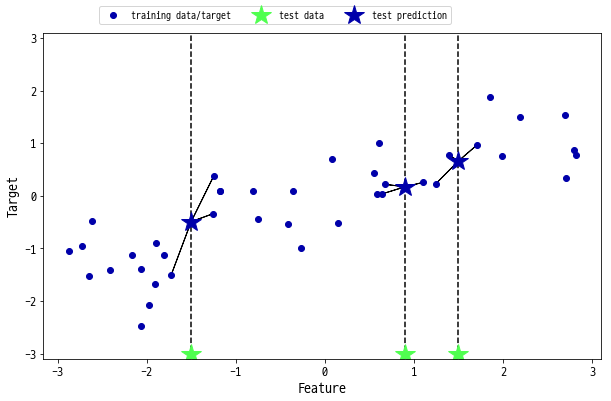

In [52]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

그림 2-9 wave 데이터셋에 대한 3-최근접 이웃 회귀 모델의 예측


scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 kNeighborsRegressor에 구현되어 있다.

In [53]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [29]:
print("Test set predictions:\n{}".format(reg.predict(X_test))) # X_test --> 10개

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


결정계수라고 하는 $R^2$값은 회귀 모델에서 예측의 적합도를 0과 1 사이값으로 계산한다. 
* 1은 예측이 완벽한 경우이고, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우이다. 
* y_train의 평균값을 예측으로 사용하면 $\hat y$이 $\bar y$와 같게되어 최종값은 0이 된다(아래 식 참조).

$R^2 = 1-\frac{\sum(y-\hat y)^2}{\sum(y-\bar y)^2}$

In [54]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


**KNeighborsRegressor 분석**

이 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있다.

* 이웃을 하나만 사용할 때는 훈련 세트의 데이터가 예측에 주는 영향이 크다. 
* 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻게 된다(그림 2-10).

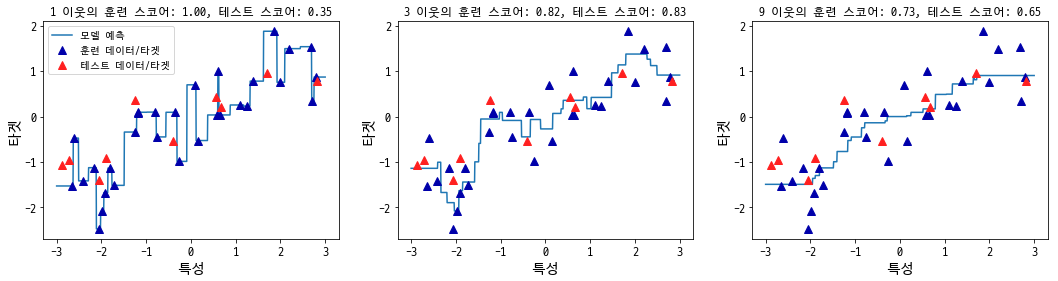

In [31]:
fig, axes = plt.subplots(1,3, figsize=(18,4))
# -3 ~ 3 사이에 1000개의 데이터 생성
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # blue color
    ax.plot(X_test, y_test, '^', c=mglearn.cm2(1), markersize=8) # red color
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f}, 테스트 스코어: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타겟")

axes[0].legend(["모델 예측", "훈련 데이터/타겟", "테스트 데이터/타겟"], loc="best")

그림 2-10 이웃의 수에 따라 최근접 이웃 회귀로 만들어진 예측 비교

* 이웃 하나만 사용할 때는 훈련 세트의 각 데이터 포인터가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인터를 지나간다. 이는 매우 불안정한 예측을 만들어 낸다.
* 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞지만 더 안정화된 예측을 얻게 된다.


**장단점과 매개변수**

KNeighbors 분류기의 중요한 매개변수 : 데이터 포인트 사이의 거리를 재는 방법, 이웃의 수 거리 재는 방법은 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용한다. 실제로 이웃의 수는 3~5개 정도로 적을 때 잘 동작한다.

k-NN의 장점 : 이해하기 쉬운 모델, 많은 조정 없이 좋은 성능을 발휘하기도 한다. 모델 생성이 빠르다.(단순히 읽고 저장하는 것으로 생성 완료)

k-NN의 단점 : 훈련 세트가 매우 크면 예측이 느려진다. 수백개 이상의 많은 특성을 가진 데이터셋에는 잘 동작하지 않는다. 특성 값 대부분이 0인 데이터셋에도 잘 작동하지 않는다.

즉, 
* k-NN은 이해하기 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않는다. 
* 또한 이웃간의 거리를 계산할 때 특성간에 데이터의 분포가 범위가 작은 특성에 크게 영향을 받는다. 따라서 스케일 조정이 필요하다.

### 2.3.3 선형 모델
선형 모델은 입력 특성에 대한 **선형 함수**를 만들어 예측을 수행한다.

**회귀의 선형 모델**
일반화된 예측 함수는 다음과 같다.

$$\hat{y}=w[0]\times x[0]+w[1]\times x[1]+...+w[p]\times x[p]+b$$

$x[0]$부터 $x[p]$까지는 하나의 데이터 포인트에 대한 특성이며, $w$와 $b$는 모델이 학습할 파라미터, $\hat{y}$은 모델이 만들어낸 예측값.
특성이 하나인 데이터셋이라면 다음과 같다.

$$\hat{y}=w[0]\times x[0]+b$$$w[0]$은 기울기, $b$는 y 절편.


1차원 wave 데이터셋으로 파라미터를 직선처럼 되도록 학습시키자.

w[0]: 0.393906  b: -0.031804


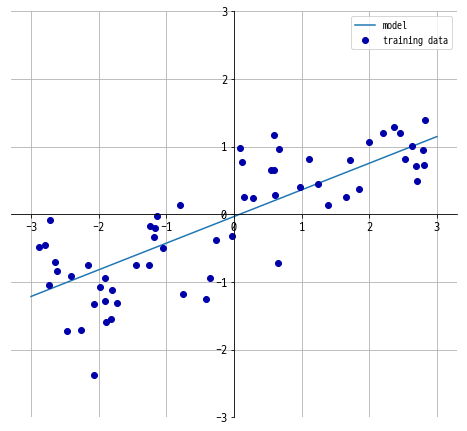

In [55]:
mglearn.plots.plot_linear_regression_wave()

* 회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면, 그 이상일 땐 초평면<sup>hyperplane</sup>이 된다. 
* 직선을 사용한 예측은 데이터의 상세 정보를 모두 잃어버린 것 같지만 특성이 많은 데이터셋이라면 매우 훌륭한 성능을 낼 수 있다. 
* 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃도 완벽하게 선형 함수로 모델링할 수 있다.


선형 회귀 모델은 파라미터를 학습하는 방법과 모델의 복잡도를 제어하는 방법에 따라 다양하다. 이 모델들은 훈련데이터로부터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 난다.
우리는 회귀에서 가장 인기 있는 선형 모델들을 살펴보자.

**선형 회귀(최소제곱법)**

**선형 회귀**<sup>linear regression</sup> 또는 **최소제곱법**<sup>OLS, ordinary least squares</sup>은 가장 간단하고 오래된 선형 알고리즘이다. 예측과 타깃 y사이의 **평균제곱오차**<sup>mean squared error</sup>를 최소화하는 파라미터 w와 b를 찾는다. 매개변수가 없는 것이 장점이지만 그래서 모델의 복잡도를 제어할 방법도 없다. 

$MSE={1 \over n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$

(n은 샘플의 수)

In [33]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

기울기(w)는 가중치<sup>weight</sup> 또는 계수<sup>coefficient</sup>라고 하며 lr 객체의 coef_ 속성에 저장되어 있고 편향<sup>offset</sup> 또는 절편<sup>intercept</sup> 파라미터(b)는 intercept_ 속성에 저장되어 있다. scikit-learn은 훈련 데이터에서 유도된 속성은 사용자가 지정한 매개변수와 구분하기 위해 항상 끝에 밑줄을 붙인다.

In [56]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973
훈련 세트 점수: 0.64
테스트 세트 점수: 0.77


* $R^2$ 값이 0.66인 것은 좋은 결과가 아니다. 
* **훈련 세트와 테스트 세트의 점수가 비슷한데 이는 과소적합인 상태**를 의미한다. 
* 1차원 데이터셋에서는 모델이 단순하므로 과대적합을 걱정할 필요가 없지만 고차원 데이터셋에서는 과대적합의 가능성이 높다. 

LinearRegression모델이 보스턴 주택가격 데이터셋 같은 복잡한 경우에 어떻게 동작하는지 한 번 살펴보자. 이 데이터셋은 샘플이 506개이고 특성은 유도된 것을 합쳐 105개 입니다.

In [26]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


훈련 세트 예측이 정확하지만 테스트 세트에서는 매우 낮다. 이는 과대적합되었다는 의미로 복잡도를 제어할 수 있는 모델을 사용이다. 복잡도를 제어하기 위해 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 **릿지 회귀**이다.

**릿지<sup>Ridge</sup>회귀**

릿지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측함수를 사용한다. 하지만 릿지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다. 가중치의 절댓값을 가능한 한 작게 만드는 것입니다. 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원합니다. 직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만듭니다(기울기를 작게 만듭니다). 이런 제약을 **규제**<sup>regularization</sup>라고 합니다. 

규제<sup>regularization</sup>는 과대적합이 되지 않도록 모델을 강제로 제한한다는 것이다. 릿지 회귀는 가중치의 절댓값을 가능한 한 작게 만드려는 것으로 릿지 회귀에 사용하는 규제 방식을 L2 규제라고 한다.
> 수학적으로 릿지는 계수의 L2 노름(norm)의 제곱을 페널티로 적용한다. 평균제곱오차(MSE) 식에 $\alpha \sum_{j=1}^m w_j^2$ 항(m은 특성의 수)이 추가된다. $\alpha$의 크기에 따라 페널티의 효과가 달라진다.(기본값:1.0) 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움이 된다.


릿지 회귀는 linear_model.Ridge에 구현되어 있습니다. 릿지 회귀가 확장된 보스턴 주택가격 데이터셋에 어떻게 적용되는지 살펴보겠습니다.

In [27]:
from sklearn.linear_model import Ridge

# 기본 alpha값 = 1
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


* 결과를 보니 훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높습니다. 
* 기대한 대로입니다. 
* 선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어집니다. 
* 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됩니다. 
* 관심 있는 것은 테스트 세트에 대한 성능이기 때문에 LinearRegression보다 Ridge 모델을 선택해야 합니다.


* Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공합니다. 
* 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있습니다. 
* 앞의 예제에서는 매개변수의 기본값인 alpha=1.0을 사용했습니다. 
* 하지만 이 값이 최적이라고 생각할 이유는 없습니다. 최적의 alpha 값은 사용하는 데이터셋에 달렸습니다. 
* alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있습니다. 

예를 들면 다음과 같습니다.

In [28]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 [그림 2-1]의 오른쪽으로 이동하게 됩니다. 아주 작은 alpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아집니다.

In [29]:
# alpha = 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


* alpha=0.1이 꽤 좋은 성능을 낸 것 같습니다. 
* 테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄일 수 있을 것입니다. 
* 여기서는 alpha 값이 [그림 2-1]의 모델 복잡도와 어떤 관련이 있는지를 살펴보았습니다. 좋은 매개변수를 선택하는 방법은 5장에서 알아보도록 하겠습니다.

그러면 alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는가?

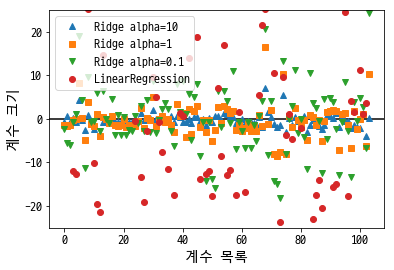

In [30]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend(fontsize=12)

그림 2-12 선형 회귀와 몇 가지 $\alpha$값을 가진 릿지 회귀의 계수 크기 비교(x=0은 첫번째 특성, x=1은 두번째 특성)

$\alpha$값이 10이면 계수의 크기가 거의 -3~3사이에 위치하고 $\alpha$=1 이면 좀더 Ridge 모델의 계수가 좀 더 커진다. $\alpha$=0.1일 때 계수는 더 커지고 아무런 규제가 없는($\alpha$=0) 선형 회귀의 계수는 값이 더 많이 커져 그림 밖으로 넘어간다.

규제의 효과를 이해하는 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시키는 것이다. 보스턴 주택 데이터셋에서 여러 크기로 샘플링해보자.(데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선 learning curve이라고 한다.)

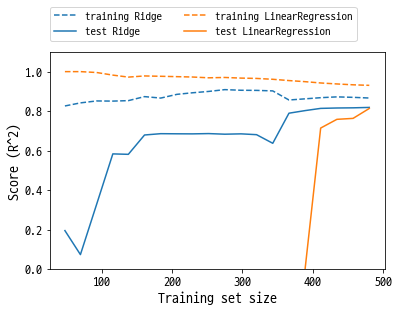

In [31]:
mglearn.plots.plot_ridge_n_samples()

* 릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 선형회귀보다 낮다. 
* 하지만 테스트 데이터에서는 릿지의 점수가 더 높다. 특히 선형 회귀는 데이터셋 크기가 400 미만일 땐 어떤 것도 학습하지 못하고 있다. 
* 두 모델의 성능은 데이터가 많아질수록 좋아진다. 데이터가 충분하다면 규제 항이 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아진다. 
* 또 선형 회귀의 훈련 데이터 성능이 데이터가 많아질수록 감소하는데, 이는 데이터가 많아지면 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.

**라쏘(Rasso)**

선형 회귀에 규제를 적용하는데 릿지의 대안으로 Lasso가 있다. 라쏘에서도 계수를 0에 가깝게 만들려고 하지만 방식을 L1 규제를 사용한다. L1 규제를 사용하면 어떤 계수는 정말 0이 된다.(모델에서 완전히 제외되는 특성이 생긴다.) 따라서 특성 선택<sup>feature selection</sup>이 자동으로 이뤄진다.

* 라쏘는 계수 벡터의 L1 노름(계수의 절댓값의 합)을 페널티로 사용한다. 평균제곱오차 식에 $\alpha \sum_{j=1}^m     \left| w_j \right|$항이 추가된다. 릿지와 마찬가지로 $\alpha$의 크기에 따라 페널티의 효과가 달라진다.

확장된 보스턴 주택가격 데이터셋에 라쏘를 적용한다.

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


두 세트에서 모두 결과가 좋지 않다. 이는 과소적합이며 105개의 특성 중 4개만 사용되었다. 과소적합을 줄이기 위해 $\alpha$ 값을 줄여본다. $\alpha$값을 줄이기 위해서는 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 한다. $\alpha$값이 줄게되면 가장 낮은 오차를 찾아가는 반복횟수가 늘어나게 된다.

$\alpha$를 낮추면 모델의 복잡도가 증가하여 성능이 좋아진다. 사용된 특성이 33개뿐이라 모델을 분석하기가 더 쉽다. $\alpha$를 지나치게 낮추면 과대적합이 된다.

In [33]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생
print("alpha=0.01, max_iter=100,000 일 경우")
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

alpha=0.01, max_iter=100,000 일 경우
훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [34]:
print("\nalpha=0.0001, max_iter=100,000 일 경우")
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))


alpha=0.0001, max_iter=100,000 일 경우
훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 94


Text(0,0.5,'계수 크기')

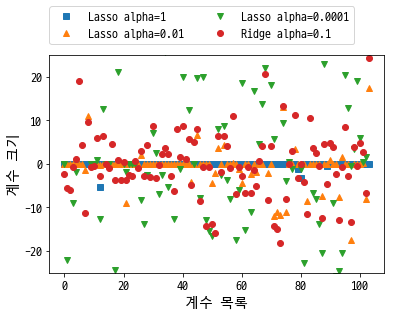

In [35]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05),fontsize=12)
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

alpha=1일 때 (이미 알고 있듯) 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작다는 것을 알 수 있습니다. alpha를 0.01로 줄이면 대부분의 특성이 0이 되는 (정삼각형 모양으로 나타낸) 분포를 얻게 됩니다. alpha=0.0001이 되면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델을 얻게 됩니다. 비교를 위해 릿지 회귀를 원 모양으로 나타냈습니다. alpha=0.1인 Ridge 모델은 alpha=0.01인 라쏘 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않습니다(**라쏘는 특성을 제거하지만 릿지는 제거하지 않는다**).

두 모델 중 보통은 릿지 회귀를 선호한다. 하지만 특성이 많고 그중 일부분만 중요하다면 라쏘가 더 좋은 선택일 수 있다. scikit-learn은 라쏘와 릿지의 페널티를 결합한 ElasticNet도 제공한다. 이 조합은 최고의 성능을 내지만 L1, L2 규제를 위한 매개변수 두 개를 조정해야 한다.

> Ridge, Lasso는 $\alpha$값이 작을 수록 모델의 복잡도가 증가(규제가 없어짐).

**분류용 선형 모델**

선형 모델은 분류에도 널리 사용된다. 이진 분류<sup>binary classification</sup>의 예측을 위한 방정식은 다음과 같다.

$\hat{y}=w[0] \times x[0]+w[1] \times x[1]+...+w[p] \times x[p]+b > 0 $ 

선형 회귀와 비슷하지만 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교한다. 함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 0보다 크면 +1이라고 예측합니다. 이 규칙은 분류에 쓰이는 모든 선형모델에서 동일합니다. 여기에서도 계수(w)와 절편(b)을 찾기 위한 방법이 많이 있습니다.

회귀용 선형 모델에서는 출력 ŷ이 특성의 선형 함수였습니다. 즉 직선, 평면, 초평면(차원이 3 이상일 때)입니다. 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수입니다. 다른 말로 하면 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기입니다. 이번 절에서 관련 예제를 살펴보자.

선형 모델을 학습시키는 알고리즘은 다양한데, 다음의 두 방법으로 구분할 수 있습니다.

* 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
* 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

알고리즘들은 훈련 세트를 잘 학습하는지 측정하는 방법이 각기 다릅니다. 불행하게도 수학적이고 기술적인 이유로, 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록 w와 b를 조정하는 것은 불가능합니다. 많은 애플리케이션에서 앞 목록의 첫 번째 항목(손실 함수<sup>loss function</sup>라 합니다)에 대한 차이는 크게 중요하지 않습니다.


가장 널리 알려진 두 개의 선형 분류 알고리즘은 linear_model.LogisticRegression에 구현된 로지스틱 회귀 logistic regression와 svm.LinearSVC에 구현된 선형 서포트 벡터 머신<sup>support vector machine</sup>이다. 로지스틱 회귀는 회귀가 아니라 분류 알고리즘이다.

forge 데이터셋을 사용해 로지스틱 회귀와 선형SVC 모델을 만들고 결정 경계를 그림으로 나타낸다.

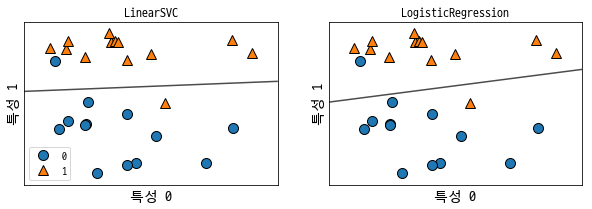

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

그림 2-15 forge 데이터셋에 기본 매개변수를 사용해 만든 선형 SVM과 로지스틱 회귀 모델의 결정 경계

* 이 두 모델은 비슷한 결정 경계를 만들었습니다. 그리고 똑같이 포인트 두 개를 잘못 분류했습니다. 
* 두 모델 모두 릿지와 마찬가지로 L2 규제를 사용한다. 규제의 강도를 결정하는 매개변수는 C이다. C 값이 커지면 규제가 감소한다(훈련 세트에 최대한 맞추려 한다).


* LogitsticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C입니다. C의 값이 높아지면 규제가 감소합니다. 다시 말해 매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면에 C 값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만듭니다.

* 매개변수 C의 작동 방식을 다르게 설명할 수도 있습니다. 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력할 것입니다. 다음은 LinearSVC를 사용한 예입니다(그림 2-16).


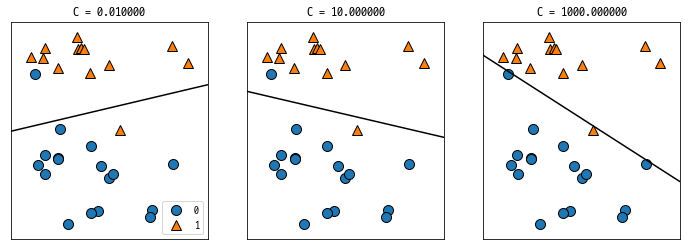

In [37]:
mglearn.plots.plot_linear_svc_regularization()

그림 2-16 forge 데이터셋에 각기 다른 C 값으로 만든 선형 SVM 모델의 결정경계

* 왼쪽 그림은 아주 작은 C 값 때문에 규제가 많이 적용되었습니다. 
* 클래스 0의 대부분은 아래에 있고 클래스 1의 대부분은 위에 있습니다. 규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만들었고 잘못 분류한 데이터 포인트는 두 개


* 중간 그림은 C 값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어졌습니다


* 오른쪽 그림에서 C 값을 아주 크게 하였더니(규제가 많이 줄어듦) 결정 경계는 더 기울었고 마침내 클래스 0의 모든 데이터 포인트를 올바로 분류했습니다. 
* 이 데이터셋의 모든 포인트를 직선으로는 완벽히 분류할 수 없기에 클래스 1의 포인트 하나는 여전히 잘못 분류되었습니다.


회귀와 마찬가지로 낮은 차원의 데이터에서는 결정 경계가 직선이나 평면이어서 제한적인 것으로 보이지만 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 과대적합되지 않도록 하는 것이 중요해진다.


유방암 데이터를 가지고 로지스틱 회귀를 분석한다.

In [38]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


정확도는 높지만 훈련 세트와 테스트 세트의 성능이 비슷하므로 과소적합인 것 같다. 제약을 풀어주기 위해 C를 증가시켰다(기본 C=1).

In [40]:
print("C=100 일때, 규제가 C=1 일 때보다 적어짐(=복잡도가 높아짐)")
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))


C=100 일때, 규제가 C=1 일 때보다 적어짐(=복잡도가 높아짐)
훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


훈련 세트의 정확도가 높아졌고 테스트 세트의 정확도도 조금 증가했습니다. 이는 복잡도가 높은 모델일수록 성능이 좋음을 말해줍니다.

In [42]:
print("\nC=0.01 일때, 규제가 C=1 일 때보다 많아짐(=복잡도가 낮아짐)")
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))


C=0.01 일때, 규제가 C=1 일 때보다 많아짐(=복잡도가 낮아짐)
훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


예상대로 이미 과소적합된 모델에서 [그림 2-1]의 왼쪽으로 더 이동하게 되므로 훈련 세트와 테스트 세트의 정확도는 기본 매개변수일 때보다 낮아집니다.



다음으로 규제 매개변수 C 설정을 세 가지로 다르게 하여 학습시킨 모델의 계수를 확인해보겠습니다(그림 2-17).

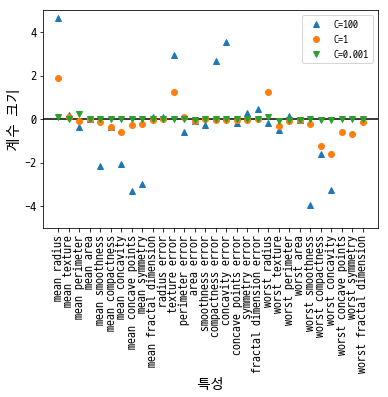

In [43]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

그림 2-17 유방암 데이터셋에 각기 다른 C 값을 사용하여 만든 로지스틱 회귀의 계수

* C=100, C=1일 때 이 계수는 음수지만, C=0.001일 때는 양수가 되며 C=1일 때보다도 절댓값이 더 큽니다. 이와 같은 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줄 수 있습니다. 예를 들면 높은 
* 예를 들면, texture error 특성은(값이 +이므로) 악성인 샘플과 관련이 깊다. mean perimeter의 경우 C에 따라 부호가 바뀌므로 양성이나 악성의 신호 모두가 될 수 있다. 그래서 선형 모델의 계수는 항상 의심해봐야 하고 조심해서 해석해야 합니다.


* 더 이해하기 쉬운 모델을 원하면 (일부 특성만 사용하는) L1 규제를 사용하는 것이 좋다. 아래는 L1 규제를 사용할 때의 분류 정확도와 계수 그래프이다.

C=0.001 인 L1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 L1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 L1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 L1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 L1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 L1 로지스틱 회귀의 테스트 정확도: 0.98


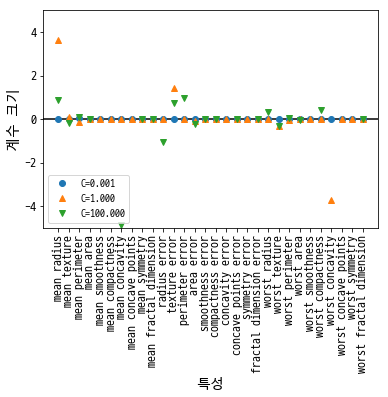

In [45]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 L1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 L1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

그림 2-18 유방암 데이터와 L1 규제를 사용하여 각기 다른 C 값을 적용한 로지스틱 회귀 모델의 계수

여기서 볼 수 있듯이, 이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많습니다. 회귀에서처럼, 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 penalty 매개변수입니다.

**다중 클래스 분류용 선형 모델**
로지스틱 회귀만 제외하고 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원합니다. 즉 다중 클래스multiclass를 지원하지 않는다.
* 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다<sup>one-vs.-rest</sup>방법이다.
* 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다. 결국 클래스의 수만큼 이진 분류 모델이 만들어집니다. 
* 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택합니다.
* 클래스별 이진 분류기를 만들면 분류 신뢰도를 나타내는 다음 공식의 값이 가장 높은 클래스가 선택된다. 

$$w[0]\times x[0]+w[1]\times x[1]+...+w[p]\times x[p]+b$$


다중 클래스 로지스틱 회귀 공식(아래)이면의 수학은 일대다 방식과는 조금 다르다. 하지만 여기서도 클래스마다 하나의 계수 벡터와 절편을 만들며, 예측 방법도 같다. 
> 다중 클래스 로지스틱 회귀 공식 
$$Pr(Y_i=c)={e^{W_{c}X_i} \over \sum_{k=1}^K e^{W_k X_i}}$$ i번째 데이터 포인트 $X_i$의 출력 $Y_i$가 클래스 c일 확률 $Pr(Y_i=c)$는 K개의 클래스에 대한 각 계수 W를 데이터 포인트에 곱하여 지수함수를 적용한 합으로 클래스 c에 대한 값을 나누어 계산한다. 보통 소프트맥스 함수의 표현에서 수식의 간소함을 위해 절편 b는 계수 벡터 W에 포함되어 있는 것으로 나타낸다.

세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용해본다. 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포를 따른다.

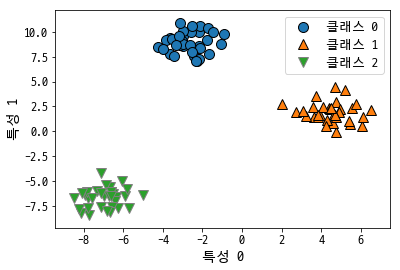

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"],fontsize=13)

그림 2-19 세 개의 클래스를 가진 2차원 데이터셋


이 데이터셋으로 LinearSVC 분류기를 훈련해보겠습니다.

In [48]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


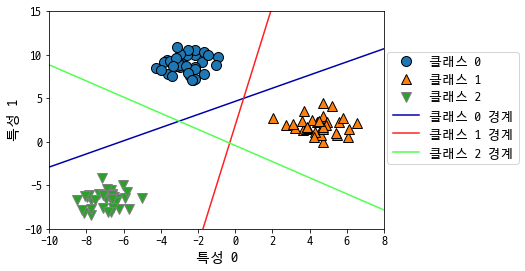

In [49]:
# 세 클래스의 경계를 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계',], loc=(1.01, 0.3), fontsize=13)

그림 2-20 세 개의 일대다 분류기가 만든 결정 경계

중앙의 삼각형 영역은 세 분류기 모두 나머지로 분류한 내용이다. 이 사이에 있는 값의 클래스는 가장 가까운 직선을 따른다.

아래는 모든 평면에 대한 예측 그래프이다.

Text(0,0.5,'특성 1')

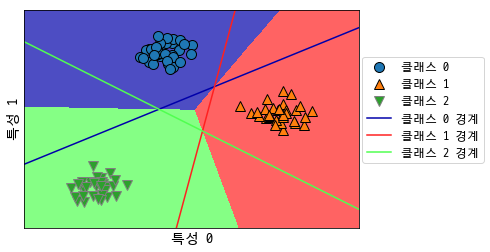

In [50]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3), fontsize=12)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

그림 2-21 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계

**장단점과 매개변수**

* 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C입니다. 
* alpha 값이 클수록, C 값이 작을수록 모델이 단순해집니다. 
* 특별히 회귀 모델에서 이 매개변수를 조정하는 일이 매우 중요합니다. 보통 C와 alpha는 로그 스케일로 최적치를 정합니다. 
* 그리고 L1 규제를 사용할지 L2 규제를 사용할지를 정해야 합니다. 
* 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용합니다. 그렇지 않으면 기본적으로 L2 규제를 사용해야 합니다. 
* L1 규제는 모델의 해석이 중요한 요소일 때도 사용할 수 있습니다. L1 규제는 몇 가지 특성만 사용하므로 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명하기 쉽습니다.

---

* 선형 모델은 학습 속도가 빠르고 예측도 빠릅니다. 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동합니다. 
* 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver=’sag’ 옵션 20 을 줍니다. 
* 다른 대안으로는 여기서 설명한 선형 모델의 대용량 처리 버전으로 구현된 SGDClassifier와 SGDRegressor를 사용할 수 있습니다.

> sag는 Stochastic Average Gradient descent(확률적 평균 경사 하강법)의 약자로서 경사하강법과 비슷하지만 반복이 진행될 때 이전에 구한 모든 경사의 평균을 사용하여 계수를 갱신한다.

* 선형 모델의 또 하나의 장점은 앞서 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다는 것입니다. 
* 하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있습니다. 특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때 그렇습니다. 그리고 이럴 땐 계수를 분석하기가 매우 어려울 수 있습니다.

---

* 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동합니다.
* 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용합니다. 
* 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋습니다. 2.3.7절 “커널화 서포트 벡터 머신”에서 선형 모델이 실패하는 예를 보도록 하겠습니다.